## Can you retire with 1M $

Description: A program to calculate using real world data if it is possible for us to retire financially (FIRE) with 1 million dollars.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a list of historical S&P500 annual returns from 2015 to 2024
annual_returns = [0.0138, 0.1196, 0.2183, -0.0438, 0.3149, 0.1540, 0.2871, -0.1811, 0.2629, 0.2502]

In [3]:
# Create a list of years corresponding to the returns
years = list(range(2015, 2025))

In [4]:
# Set the initial investment balance (ex: $1,000,000)
initial_balance = 1000000

In [5]:
# Define the annual withdrawal rate (ex: 4%)
withdrawal_rate = 0.04

In [6]:
# Initialize an empty list to score yearly results
balances = []

In [7]:
# Set the starting balance for the simulation
balance = initial_balance
starting_balance = initial_balance

# Loop through each year and its corresponding return rates
for year, return_rate in zip(years, annual_returns):
    # Calculate the withdrawal amount for the current year
    withdrawal = balance * withdrawal_rate

    # Subtract the withdrawal from the current balance
    balance -= withdrawal  # balance = balance - withdrawal

    # Calculate the interest earned on the remaining balance
    interest_earned = balance * return_rate

    # Store the balance after the withdrawal as the starting balance for this year
    starting_balance = balance

    # apply the annual return to the remaining balance
    balance *= (1 + return_rate) # balance = balance x (1 + return_rate)

    # Append the results for the current year to the balance list
    balances.append({
        "Year": year,
        "Starting Balance": round(starting_balance, 2),
        "Withdrawl Amount": round(withdrawal, 2),
        "Ending Balance": round(balance, 2)
    })

# Convert the list of yearly results into a pandas DataFrame
df = pd.DataFrame(balances)

# Print the DataFrame to display the simulation results
print(df)

   Year  Starting Balance  Withdrawl Amount  Ending Balance
0  2015         960000.00          40000.00       973248.00
1  2016         934318.08          38929.92      1046062.52
2  2017        1004220.02          41842.50      1223441.25
3  2018        1174503.60          48937.65      1123060.34
4  2019        1078137.93          44922.41      1417643.56
5  2020        1360937.82          56705.74      1570522.25
6  2021        1507701.36          62820.89      1940562.42
7  2022        1862939.92          77622.50      1525561.50
8  2023        1464539.04          61022.46      1849566.35
9  2024        1775583.70          73982.65      2219834.74


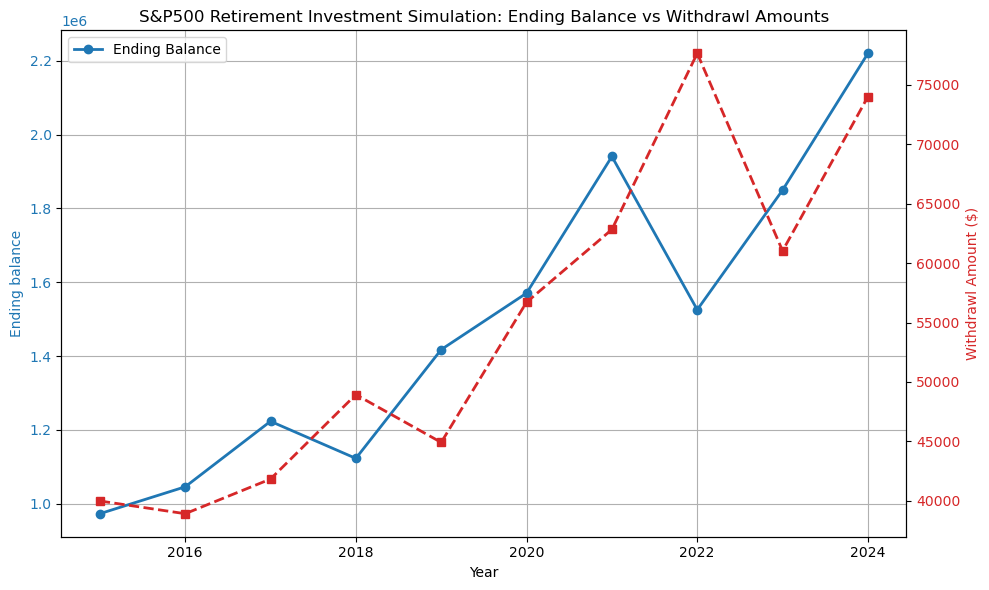

In [11]:
# Create a figure and axis for the data
fig, ax = plt.subplots(figsize=(10,6))

# Set the color for the first y-axis
color1 = 'tab:blue'

# Set the label on the x-axis 
ax.set_xlabel('Year')

# Set the label on the y-axis
ax.set_ylabel('Ending balance', color=color1)

# Set the title of the plot
ax.set_title("S&P500 Retirement Investment Simulation: Ending Balance vs Withdrawl Amounts")

# Plot the ending balance on the first y-axis
ax.plot(df['Year'], df['Ending Balance'], color=color1, marker='o', linewidth=2, label='Ending Balance')

# Set the tick label color to match the line color
ax.tick_params(axis='y', labelcolor=color1)

# Add grid lines for readability
ax.grid(True)

# Set the title of the plot
ax.set_title("S&P500 Retirement Investment Simulation: Ending Balance vs Withdrawl Amounts")

# Create a second y-axis that shares the same x-axis
ax2 = ax.twinx()

# Set the color for the second y-axis
color2 = 'tab:red'

# Set the label on the second y-axis
ax2.set_ylabel("Withdrawl Amount ($)", color=color2)

# Plot the withdrawl amount
ax2.plot(df['Year'], df['Withdrawl Amount'], color=color2, marker='s', linewidth=2, label='Withdrawl Amount', linestyle='--')

# Set the tick label color to match the line color
ax2.tick_params(axis='y', labelcolor=color2)

# Add a legend to the plot
ax.legend(loc='upper left')

# Adjust layout to prevent clipping
fig.tight_layout()

# Show the plot
plt.show()